In [1]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

In [56]:
import geopandas as gpd

## language data (demographic factor)

In [2]:
demographic_factor_df = pd.read_csv('data/CensusBGGEO_2020_-8839192176228303427.csv')
call_data_df = pd.read_csv('data/Call_Data_20240712.csv')

In [3]:
census_dict = pd.read_csv('data/race_in_combination_transpose_Neighborhoods_-4641204050997988934.csv')

In [21]:
race_dict = pd.read_csv('data/race_ethnicity_Neighborhoods_-7085838689260358328.csv')

In [4]:
demographic_factor_df = demographic_factor_df.dropna()

In [10]:
demographic_factor_df['Census Tract Label'] = demographic_factor_df['Census Tract Label'].astype(str)
demographic_factor_df['Census_Tract_Label'] = demographic_factor_df['Census Tract Label'].str.split('.').str[0]

In [11]:
columns_to_keep = [ 'Census_Tract_Label',
    'Population Speaks a Language Other than English',
    'Population Speaks English Less than Very Well',
    'Households with Limited English',
    'Spanish Limited English Speaking Households',
    'Other Indo-European Languages Limited English Speaking Households',
    'Asian and Pacific Island Languages Limited English Speaking Households',
    'Other Languages Limited English Speaking Households'
]
# Drop columns that are not in the list 'columns_to_keep'
demographic_factor_df = demographic_factor_df[columns_to_keep]

In [13]:
demographic_factor_df['Census_Tract_Label'].nunique()

119

## Race and Ethnicity 

In [28]:
# Drop the specified columns
#race_dict = race_dict.drop(columns=['Neighborhood Type (outside comp plan areas id)', 'OBJECTID', 'ACS Vintage'])
race_dict = race_dict.drop(columns=['Neighborhood Type'])

In [30]:
race_dict['NEIGH_NO'] = race_dict['NEIGH_NO'].astype(str)
race_dict['Census_Tract_Label'] = race_dict['NEIGH_NO'].str.split('.').str[0]

In [32]:
race_dict = race_dict.drop(columns=['NEIGH_NO'])

In [34]:
race_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 34 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Neighborhood Name                                                                       92 non-null     object 
 1   Neighborhood Subtype                                                                    85 non-null     object 
 2   Total Population                                                                        92 non-null     int64  
 3   White Alone Not Hispanic or Latino                                                      92 non-null     int64  
 4   Black or African American Alone Not Hispanic or Latino                                  92 non-null     int64  
 5   American Indian and Alaska Native Alone Not Hispanic or Latino           

## diff_language_census merging

In [35]:
diff_language_census = census_dict.merge(demographic_factor_df, on='Census_Tract_Label')
diff_language_census = diff_language_census.dropna()

In [169]:
diff_language_census['Race'].unique()

array(['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'Two or More Races'], dtype=object)

In [178]:
# Filter for specific races
races_of_interest = ['White', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
language_native = diff_language_census[diff_language_census['Race'].isin(races_of_interest)]

# Select relevant columns
language_native = language_native[['Neighborhood Name', 'Race', 'Population']]

# Group by Neighborhood Name and sum Population
language_native = language_native.groupby('Neighborhood Name')['Population'].sum().reset_index()
language_native

,Neighborhood Name,Population
0,23rd & Union-Jackson,54776
1,Admiral,27920
2,Alki/Admiral,131880
3,Arbor Heights,71172
4,Aurora-Licton Springs,77952
...,...,...
57,Upper Queen Anne,51000
58,Wallingford,61112
59,Wedgwood/View Ridge,118688
60,West Seattle Junction/Genesee Hill,277488


In [43]:
# Assuming your dataframe is named df
# Population Distribution by Race
race_population = diff_language_census.groupby('Race')['Population'].sum().reset_index()
race_population

,Race,Population
0,American Indian and Alaska Native,167220
1,Asian,1352456
2,Black or African American,682728
3,Native Hawaiian and Other Pacific Islander,55544
4,Some Other Race,367250
5,Two or More Races,319765
6,White,4750064


In [158]:
race_population_white

,Race,Population
6,White,4750064


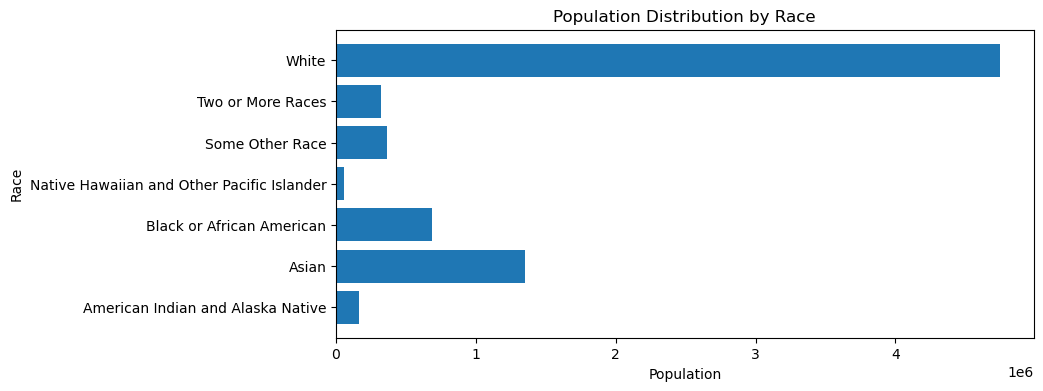

In [53]:
# Population Distribution by Race
plt.figure(figsize=(9, 4))
plt.barh(race_population['Race'], race_population['Population'])
plt.ylabel('Race')
plt.xlabel('Population')
plt.title('Population Distribution by Race')
plt.show()

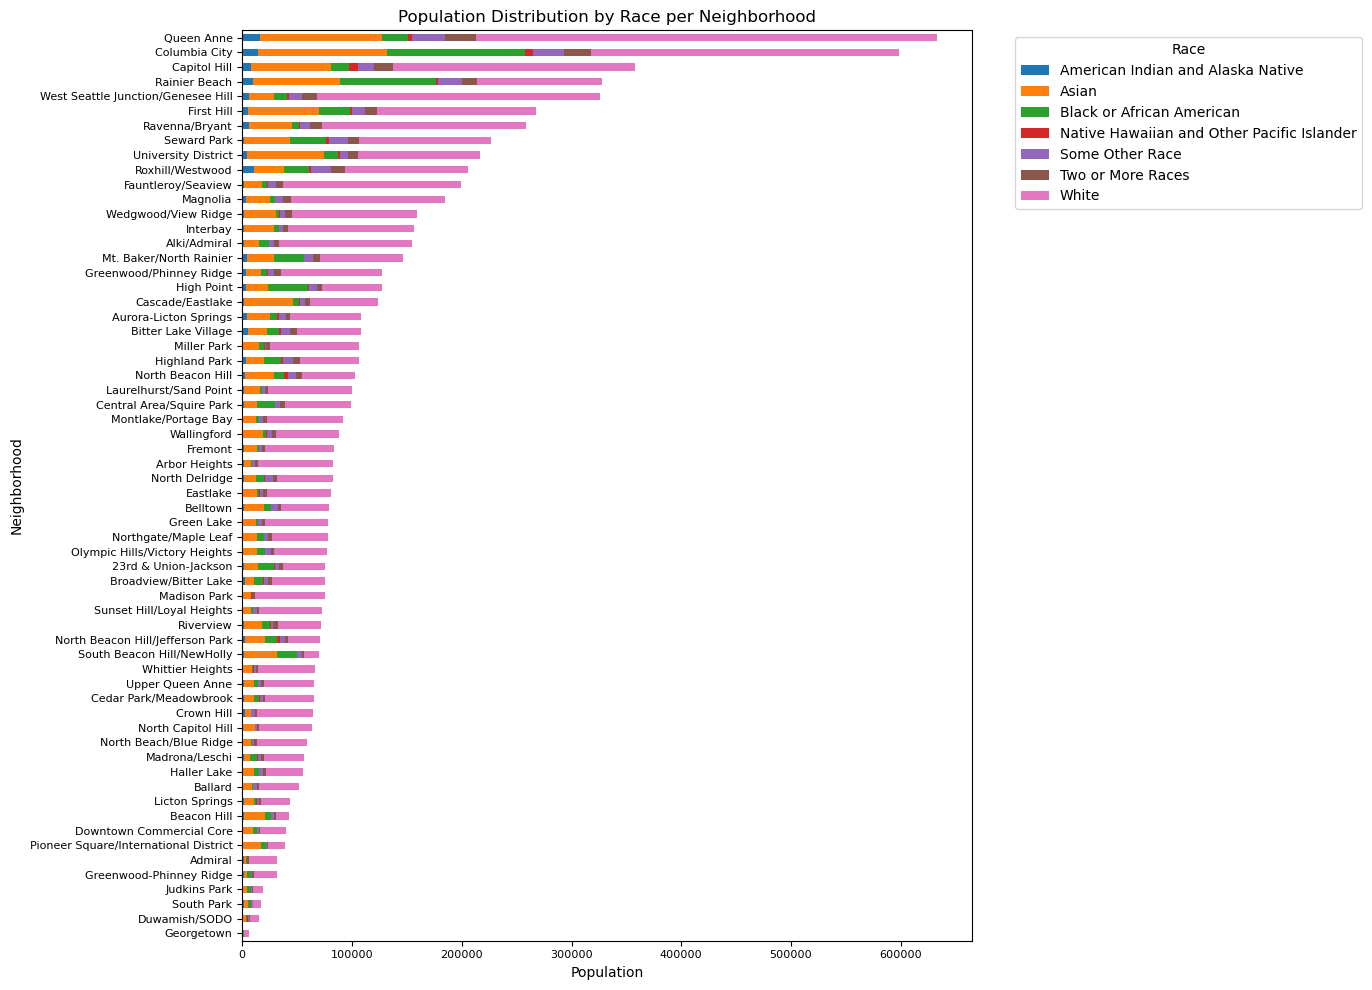

In [82]:
# Grouping by Neighborhood and Race, and summing the populations
grouped = diff_language_census.groupby(['Neighborhood Name', 'Race'])['Population'].sum().unstack().fillna(0)

# Calculating the total population per neighborhood
grouped['Total'] = grouped.sum(axis=1)

# Sorting the neighborhoods by total population in descending order
grouped_sorted = grouped.sort_values(by='Total', ascending=True).drop(columns='Total')

# Plotting population distribution by race per neighborhood
grouped_sorted.plot(kind='barh', stacked=True, figsize=(14, 10))

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population Distribution by Race per Neighborhood')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [63]:
# Example selection of columns (adjust based on your specific columns of interest)
columns_of_interest = [
    'Neighborhood Name',
    'Population Speaks a Language Other than English',
    'Population Speaks English Less than Very Well',
    'Households with Limited English',
    'Spanish Limited English Speaking Households',
    'Other Indo-European Languages Limited English Speaking Households',
    'Asian and Pacific Island Languages Limited English Speaking Households',
    'Other Languages Limited English Speaking Households'
]

# Subset the DataFrame with the selected columns
data_subset = diff_language_census[columns_of_interest]

# Aggregate by neighborhood
data_aggregated = data_subset.groupby('Neighborhood Name').sum().reset_index()


In [70]:
data_aggregated

,Neighborhood Name,Population Speaks a Language Other than English,Population Speaks English Less than Very Well,Households with Limited English,Spanish Limited English Speaking Households,Other Indo-European Languages Limited English Speaking Households,Asian and Pacific Island Languages Limited English Speaking Households,Other Languages Limited English Speaking Households
0,23rd & Union-Jackson,3059,1615,304,0,0,304,0
1,Admiral,21831,11457,3724,1748,0,1976,0
2,Alki/Admiral,35986,13186,6479,1083,456,2565,2375
3,Arbor Heights,35986,13186,6479,1083,456,2565,2375
4,Aurora-Licton Springs,45581,23009,8094,912,0,3952,3230
...,...,...,...,...,...,...,...,...
57,Upper Queen Anne,15181,3078,760,0,247,513,0
58,Wallingford,11609,3477,988,0,0,988,0
59,Wedgwood/View Ridge,24852,7980,1539,0,0,1235,304
60,West Seattle Junction/Genesee Hill,35986,13186,6479,1083,456,2565,2375


In [144]:
# Sort neighborhoods by a specific column (e.g., 'Population Speaks a Language Other than English')
data_aggregated_sorted = data_aggregated.sort_values(by='Population Speaks a Language Other than English', ascending=True)
# Calculate cumulative values for each category
data_aggregated_sorted['Speaks Another Language'] = data_aggregated_sorted['Population Speaks a Language Other than English']
data_aggregated_sorted['Speaks English Less than Very Well'] = data_aggregated_sorted['Population Speaks English Less than Very Well']
data_aggregated_sorted['Household with Limited English'] = data_aggregated_sorted[['Population Speaks a Language Other than English', 'Population Speaks English Less than Very Well']].sum(axis=1)

In [148]:
# Drop original columns after calculating cumulative values
data_aggregated_sorted = data_aggregated_sorted[['Neighborhood Name', 'Speaks Another Language', 'Speaks English Less than Very Well', 'Households with Limited English']]

In [149]:
data_aggregated_sorted

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English
0,23rd & Union-Jackson,3059,1615,304
34,Madrona/Leschi,6384,1216,133
13,Central Area/Squire Park,6384,1216,133
30,Judkins Park,6384,1216,133
45,Olympic Hills/Victory Heights,6954,1862,513
...,...,...,...,...
52,Seward Park,57266,27531,9272
48,Rainier Beach,57266,27531,9272
38,Mt. Baker/North Rainier,57266,27531,9272
40,North Beacon Hill,110922,70376,15390


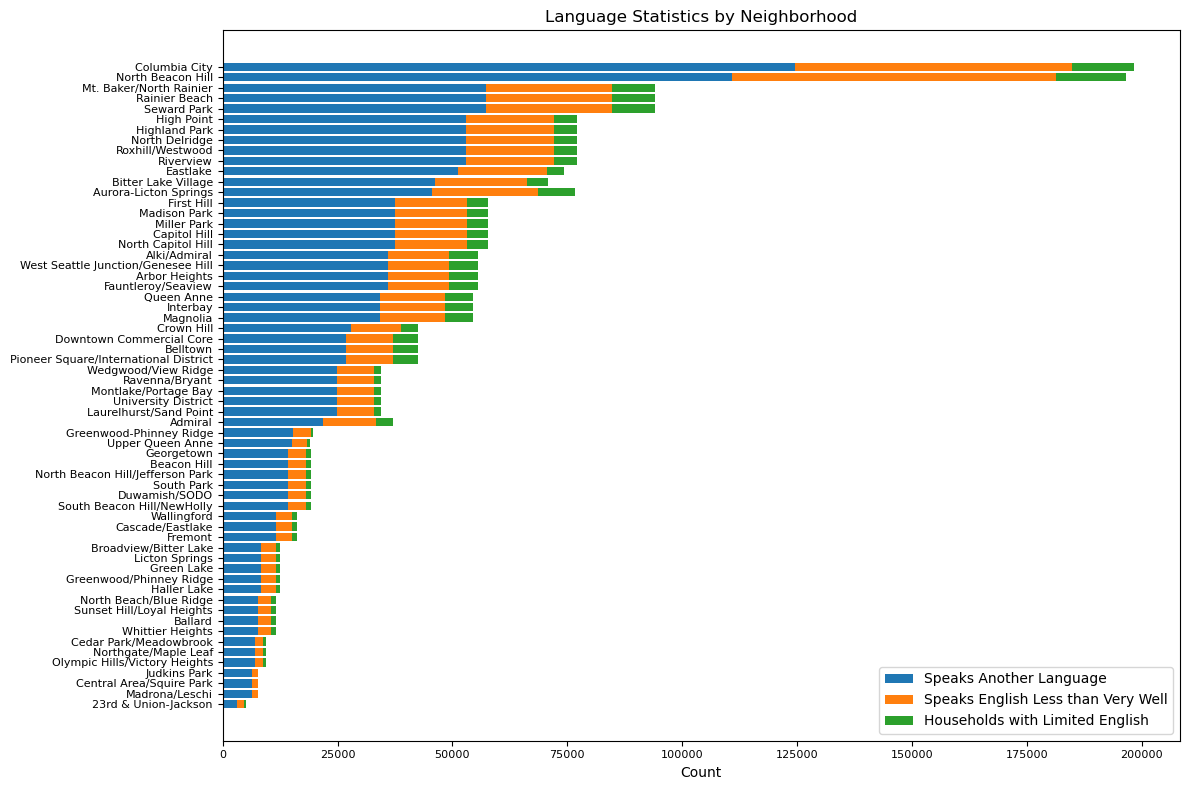

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_aggregated is already prepared as per the previous steps

# Sort neighborhoods by a specific column (e.g., 'Population Speaks a Language Other than English')
data_aggregated_sorted = data_aggregated.sort_values(by='Population Speaks a Language Other than English', ascending=True)

# Set the neighborhood names as x-axis labels
neighborhoods = data_aggregated_sorted['Neighborhood Name']

# Plotting each language-related variable
plt.figure(figsize=(12, 8))
plt.barh(neighborhoods, data_aggregated_sorted['Population Speaks a Language Other than English'], label='Speaks Another Language')
plt.barh(neighborhoods, data_aggregated_sorted['Population Speaks English Less than Very Well'], label='Speaks English Less than Very Well', left=data_aggregated_sorted['Population Speaks a Language Other than English'])
plt.barh(neighborhoods, data_aggregated_sorted['Households with Limited English'], label='Households with Limited English', left=data_aggregated_sorted[['Population Speaks a Language Other than English', 'Population Speaks English Less than Very Well']].sum(axis=1))
# Add more bars as needed for other variables

# Customize the plot
plt.xlabel('Count')
plt.title('Language Statistics by Neighborhood')
plt.legend()

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()


In [95]:
data_aggregated_sorted

,Neighborhood Name,Population Speaks a Language Other than English,Population Speaks English Less than Very Well,Households with Limited English,Spanish Limited English Speaking Households,Other Indo-European Languages Limited English Speaking Households,Asian and Pacific Island Languages Limited English Speaking Households,Other Languages Limited English Speaking Households
0,23rd & Union-Jackson,3059,1615,304,0,0,304,0
34,Madrona/Leschi,6384,1216,133,0,0,133,0
13,Central Area/Squire Park,6384,1216,133,0,0,133,0
30,Judkins Park,6384,1216,133,0,0,133,0
45,Olympic Hills/Victory Heights,6954,1862,513,19,0,494,0
...,...,...,...,...,...,...,...,...
52,Seward Park,57266,27531,9272,1444,1121,3287,3420
48,Rainier Beach,57266,27531,9272,1444,1121,3287,3420
38,Mt. Baker/North Rainier,57266,27531,9272,1444,1121,3287,3420
40,North Beacon Hill,110922,70376,15390,0,0,11533,3857


## crime data

In [83]:
crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')

In [110]:
crime_df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128967,2013-247888,7687554356,2013-07-13 01:00:00,NaN,2013-07-13 06:37:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1128968,2013-227022,7682354808,2013-06-26 11:00:00,06/29/2013 06:30:00 AM,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
1128969,2012-045494,7672915592,2012-02-14 15:04:00,NaN,2012-02-14 15:04:00,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1128970,2010-328592,7692227482,2010-09-19 16:59:00,NaN,2010-09-19 16:59:00,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [86]:
# Convert necessary date columns to datetime type 
crime_df['Offense Start DateTime'] = pd.to_datetime(crime_df['Offense Start DateTime'])
crime_df['Report DateTime'] = pd.to_datetime(crime_df['Report DateTime'])

# Filter data for the years 2014-2022
df_filtered = crime_df[crime_df['Offense Start DateTime'].dt.year.between(2014, 2022)]

# Group by neighborhood columns and count unique Report Numbers
neighborhood_counts = df_filtered.groupby(['Precinct', 'Sector', 'Beat']).agg({'Report Number': pd.Series.nunique}).reset_index()

In [92]:
# Apply the mapping to the 'Beat' column
neighborhood_counts['Neighborhood Name'] = neighborhood_counts['Beat'].map(mapping).fillna(neighborhood_counts['Beat'])

In [107]:
neighborhood_counts[neighborhood_counts['Beat'] == 'B1']
#print(neighborhood_counts[neighborhood_counts['Beat'] == 'B1'].sum())

,Precinct,Sector,Beat,Report Number,Neighborhood Name
1,E,B,B1,1,Bitter Lake Village
20,N,B,B1,14914,Bitter Lake Village


In [109]:
# Group by 'Beat' and aggregate 'Report Number' and 'Neighborhood Name'
beat_counts = neighborhood_counts.groupby('Beat').agg({
    'Report Number': 'sum',
    'Neighborhood Name': lambda x: ', '.join(x.unique())  # Combine unique neighborhood names into a comma-separated string
}).reset_index()

,Beat,Report Number
0,99,99
1,B1,14915
2,B2,15971
3,B3,15203
4,C1,10506
5,C2,8687
6,C3,8967
7,D1,13440
8,D2,13525
9,D3,12231


## 911 call data

In [112]:
call_data_911 = call_data_df[call_data_df['Call Type'] == '911']
call_data_911 = call_data_911.dropna()

In [91]:
mapping = {
    'Q3': 'Queen Anne',
    'C2': '23rd & Union-Jackson',
    'C3': 'Capitol Hill',
    'L1': 'Licton Springs',
    'Q1': 'Uptown',
    'J1': 'Highland Park',
    'J3': 'South Beacon Hill/NewHolly',
    'U1': 'Alki/Admiral',
    'B2': 'Fremont',
    'U3': 'North Delridge',
    'J2': 'Roxhill/Westwood',
    'F1': 'West Seattle Junction',
    'B3': 'Ballard',
    'O2': 'South Lake Union',
    'W3': 'Licton Springs',
    'L2': 'Greenwood/Phinney Ridge',
    'K2': 'Madison Park',
    'D1': 'Downtown',
    'B1': 'Bitter Lake Village',
    'G1': 'Rainier Beach',
    'N1': 'Northgate',
    'M1': 'Capitol Hill',
    'M2': 'Central Area/Squire Park',
    'S1': 'Seward Park',
    'N3': 'Olympic Hills/Victory Heights',
    'U2': 'High Point',
    'N2': 'Cedar Park/Meadowbrook',
    'E3': 'Ravenna/Bryant',
    'E2': 'Wedgwood/View Ridge',
    'L3': 'North Beach/Blue Ridge',
    'E1': 'Laurelhurst/Sand Point',
    'R3': 'Interbay',
    'S3': 'Whittier Heights',
    'O3': 'Crown Hill',
    'K3': 'Montlake/Portage Bay',
    'D2': 'First Hill',
    'Q2': 'Magnolia',
    'R2': 'Cascade/Eastlake',
    'S2': 'Sunset Hill/Loyal Heights',
    'R1': 'Belltown',
    'M3': 'Montlake/Portage Bay',
    'G3': 'Georgetown',
    'C1': '23rd & Union-Jackson',
    'G2': 'Duwamish/SODO',
    'F2': 'Admiral',
    'D3': 'Pioneer Square/International District',
    'F3': 'West Seattle Junction',
    'O1': 'Downtown Commercial Core',
    'K1': 'Outside Villages',
    'W2': 'Aurora-Licton Springs',
    'W1': 'Greenwood-Phinney Ridge',
    '99': 'Outside Villages',
    'H3': 'Capitol Hill',
    'SW': 'West Seattle Junction/Genesee Hill',
    'CTY': 'Central Area/Squire Park'
}


In [114]:
# Convert 'Original Time Queued' to datetime format
call_data_911['Original Time Queued'] = pd.to_datetime(call_data_911['Original Time Queued'], errors='coerce')

# Filter data for the years 2014-2022
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2022-12-31')
call_data_911 = call_data_911[(call_data_911['Original Time Queued'] >= start_date) & (call_data_911['Original Time Queued'] <= end_date)]


In [121]:
# Convert 'Original Time Queued' and 'Arrived Time' to datetime format
call_data_911['Arrived Time'] = pd.to_datetime(call_data_911['Arrived Time'])

# Calculate response time in seconds
call_data_911['Response Time in mins'] = (call_data_911['Arrived Time'] - call_data_911['Original Time Queued']).dt.total_seconds()/60.0

In [128]:
call_data_911 = call_data_911.dropna()

In [130]:
# Group by year and neighborhood, calculate average response time
call_data_911['Year'] = call_data_911['Original Time Queued'].dt.year
average_response_time = call_data_911.groupby(['Year', 'Beat'])['Response Time in mins'].median().reset_index()

In [131]:
average_response_time

,Year,Beat,Response Time in mins
0,2014,99,22.391667
1,2014,B1,19.300000
2,2014,B2,18.683333
3,2014,B3,19.816667
4,2014,C1,10.375000
...,...,...,...
466,2022,U2,18.991667
467,2022,U3,22.166667
468,2022,W1,18.966667
469,2022,W2,17.008333


In [191]:
averages_response_time_2014 = average_response_time[average_response_time['Year'] == 2014]
averages_response_time_2014.drop(columns='Neighborhood Name')

,Year,Beat,Response Time in mins
0,2014,99,22.391667
1,2014,B1,19.300000
2,2014,B2,18.683333
3,2014,B3,19.816667
4,2014,C1,10.375000
5,2014,C2,14.525000
6,2014,C3,11.291667
7,2014,D1,10.766667
8,2014,D2,12.941667
9,2014,D3,13.783333


In [199]:
averages_response_time_2014 = averages_response_time_2014.merge(data_aggregated_sorted,on='Neighborhood Name')


In [200]:
averages_response_time_2014_final = averages_response_time_2014.merge(language_native,on='Neighborhood Name')

In [201]:
averages_response_time_2014_final

,Year,Beat,Response Time in mins,Neighborhood Name,Speaks Another Language_x,Speaks English Less than Very Well_x,Households with Limited English_x,Speaks Another Language_y,Speaks English Less than Very Well_y,Households with Limited English_y,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English,Population
0,2014,B1,19.300000,Bitter Lake Village,46303,19817,4712,46303,19817,4712,46303,19817,4712,75912
1,2014,B2,18.683333,Fremont,11609,3477,988,11609,3477,988,11609,3477,988,66640
2,2014,B3,19.816667,Ballard,7619,2983,988,7619,2983,988,7619,2983,988,37124
3,2014,C1,10.375000,23rd & Union-Jackson,3059,1615,304,3059,1615,304,3059,1615,304,54776
4,2014,C2,14.525000,23rd & Union-Jackson,3059,1615,304,3059,1615,304,3059,1615,304,54776
5,2014,C3,11.291667,Capitol Hill,37430,15732,4541,37430,15732,4541,37430,15732,4541,253080
6,2014,M1,11.725000,Capitol Hill,37430,15732,4541,37430,15732,4541,37430,15732,4541,253080
7,2014,D2,12.941667,First Hill,37430,15732,4541,37430,15732,4541,37430,15732,4541,178728
8,2014,D3,13.783333,Pioneer Square/International District,26828,10317,5301,26828,10317,5301,26828,10317,5301,20016
9,2014,E1,9.216667,Laurelhurst/Sand Point,24852,7980,1539,24852,7980,1539,24852,7980,1539,80176


In [182]:
language_native

,Neighborhood Name,Population
0,23rd & Union-Jackson,54776
1,Admiral,27920
2,Alki/Admiral,131880
3,Arbor Heights,71172
4,Aurora-Licton Springs,77952
...,...,...
57,Upper Queen Anne,51000
58,Wallingford,61112
59,Wedgwood/View Ridge,118688
60,West Seattle Junction/Genesee Hill,277488


## merge language data (demographic factor) with 911 call data

In [18]:
#merge_call_911_language = call_data_911.merge(diff_language_census, on='Neighborhood Name')

In [19]:
#merge_call_911_language = merge_call_911_language.dropna(inplace=True)

In [20]:
merge_911_language = pd.merge(call_data_911,diff_language_census,on='Neighborhood Name', how='left')

In [ ]:
merge_911_language.info()

## HYpothesis testing

In [26]:
# Define threshold based on your criteria (e.g., median, percentile, absolute value)
#threshold = merge_911_language['Population Speaks a Language Other than English'].median()
#threshold

349.0

In [27]:
# Define groups based on linguistic diversity
#high_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] > threshold]
#low_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] <= threshold]


In [30]:

# Assuming merge_911_language is your merged dataframe
# Convert 'Original Time Queued' and 'Arrived Time' to datetime format
merge_911_language['Original Time Queued'] = pd.to_datetime(merge_911_language['Original Time Queued'])
merge_911_language['Arrived Time'] = pd.to_datetime(merge_911_language['Arrived Time'])

# Calculate response time in minutes
merge_911_language['Response Time'] = (merge_911_language['Arrived Time'] - merge_911_language['Original Time Queued']).dt.total_seconds() / 60.0

# Now, define threshold based on your criteria (e.g., median, percentile, absolute value)
threshold = merge_911_language['Population Speaks a Language Other than English'].median()

# Define groups based on linguistic diversity
high_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] > threshold]
low_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] <= threshold]

# Extract response times in minutes for each group
response_times_high = high_diversity['Response Time']
response_times_low = low_diversity['Response Time']

# Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(response_times_high, response_times_low, equal_var=False)  # Assuming unequal variances

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in response times between neighborhoods with high and low linguistic diversity.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in response times between neighborhoods with high and low linguistic diversity.")


Reject null hypothesis: There is a significant difference in response times between neighborhoods with high and low linguistic diversity.


In [32]:
print(p_value)
print(t_stat)

0.0
43.16068466246237


### Combine response times 

## plot

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns